# City Street Network Orientations - Hungarian Cities

Based on: https://github.com/gboeing/osmnx-examples/blob/main/notebooks/17-street-network-orientations.ipynb

Compare the spatial orientations of Hungarian city street networks with OSMnx.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox

%matplotlib inline
weight_by_length = False

In [20]:
# define the study sites as label: query
places = {
    'Debrecen' : 'Debrecen, Hungary',
    'Szeged' : 'Szeged, Hungary',
    'Miskolc' : 'Miskolc, Hungary',
    'Pécs' : 'Pécs, Hungary',
    'Győr' : 'Győr, Hungary',
    'Nyíregyháza' : 'Nyíregyháza, Hungary',
    'Kecskemét' : 'Kecskemét, Hungary',
    'Székesfehérvár' : 'Székesfehérvár, Hungary',
    'Szombathely' : 'Szombathely, Hungary',
    'Szolnok' : 'Szolnok, Hungary',
    'Érd' : 'Érd, Hungary',
    'Tatabánya': 'Tatabánya, Hungary',
    'Sopron': 'Sopron, Hungary',
    'Kaposvár' : 'Kaposvár, Hungary',
    'Veszprém' : 'Veszprém, Hungary',
    'Békéscsaba' : 'Békéscsaba, Hungary',
}

In [21]:
# verify OSMnx geocodes each query to what you expect (i.e. a [multi]polygon geometry)
gdf = ox.geocode_to_gdf(list(places.values()))
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((21.43653 47.53555, 21.43806 47.53209...",47.636982,47.425047,21.883308,21.436531,307860955,relation,1444234,47.531399,21.625978,boundary,administrative,16,0.604475,city,Debrecen,"Debrecen, Debreceni járás, Hajdú-Bihar, North ..."
1,"POLYGON ((19.97243 46.29037, 19.97733 46.28804...",46.349891,46.115796,20.308551,19.972430,307794271,relation,1025105,46.254631,20.148602,boundary,administrative,16,0.592509,city,Szeged,"Szeged, Szegedi járás, Csongrád-Csanád, South ..."
2,"POLYGON ((20.48168 48.09587, 20.48721 48.09009...",48.154919,48.023563,20.869874,20.481677,308047964,relation,1440895,48.103064,20.790043,boundary,administrative,16,0.593805,city,Miskolc,"Miskolc, Miskolci járás, Borsod-Abaúj-Zemplén,..."
3,"POLYGON ((18.13581 46.06570, 18.13586 46.06463...",46.161608,45.994167,18.366000,18.135806,307779569,relation,575380,46.076509,18.228032,boundary,administrative,16,0.598332,city,Pécs,"Pécs, Pécsi járás, Baranya, Southern Transdanu..."
4,"POLYGON ((17.50987 47.63116, 17.51047 47.63041...",47.747830,47.591554,17.808173,17.509875,307992120,relation,1440627,47.687609,17.634681,boundary,administrative,16,0.590326,city,Gyor,"Gyor, Győri járás, Győr-Moson-Sopron, Western ..."
5,"POLYGON ((21.55752 47.91619, 21.56971 47.91059...",48.039845,47.845659,21.843794,21.557519,308041287,relation,1447608,47.955780,21.716798,boundary,administrative,16,0.550798,city,Nyíregyháza,"Nyíregyháza, Nyíregyházi járás, Szabolcs-Szatm..."
6,"POLYGON ((19.50680 46.95507, 19.50956 46.95316...",47.001254,46.769920,19.851774,19.506801,307984134,relation,1130433,46.907388,19.691721,boundary,administrative,16,0.556216,city,Kecskemét,"Kecskemét, Kecskeméti járás, Bács-Kiskun, Sout..."
7,"POLYGON ((18.32885 47.20801, 18.33183 47.20319...",47.281484,47.108025,18.553752,18.328853,307887552,relation,1361450,47.191017,18.410811,boundary,administrative,16,0.570533,city,Székesfehérvár,"Székesfehérvár, Székesfehérvári járás, Fejér, ..."
8,"POLYGON ((16.52795 47.26384, 16.52797 47.26346...",47.282524,47.154389,16.698004,16.527948,307935817,relation,1131673,47.229118,16.618762,boundary,administrative,16,0.563427,city,Szombathely,"Szombathely, Szombathelyi járás, Vas, Western ..."
9,"POLYGON ((20.07092 47.15618, 20.08560 47.15044...",47.264530,47.096621,20.296049,20.070923,307974216,relation,1273068,47.175383,20.194628,boundary,administrative,16,0.533043,city,Szolnok,"Szolnok, Szolnoki járás, Jász-Nagykun-Szolnok,..."


2023-08-18 17:40:48 Békéscsaba
2023-08-18 17:41:02 Debrecen
2023-08-18 17:41:39 Győr
2023-08-18 17:42:11 Kaposvár
2023-08-18 17:42:25 Kecskemét
2023-08-18 17:42:55 Miskolc
2023-08-18 17:43:34 Nyíregyháza
2023-08-18 17:43:57 Pécs
2023-08-18 17:44:42 Sopron
2023-08-18 17:45:00 Szeged
2023-08-18 17:45:39 Szolnok
2023-08-18 17:45:55 Szombathely
2023-08-18 17:46:12 Székesfehérvár
2023-08-18 17:46:32 Tatabánya
2023-08-18 17:46:46 Veszprém
2023-08-18 17:46:59 Érd


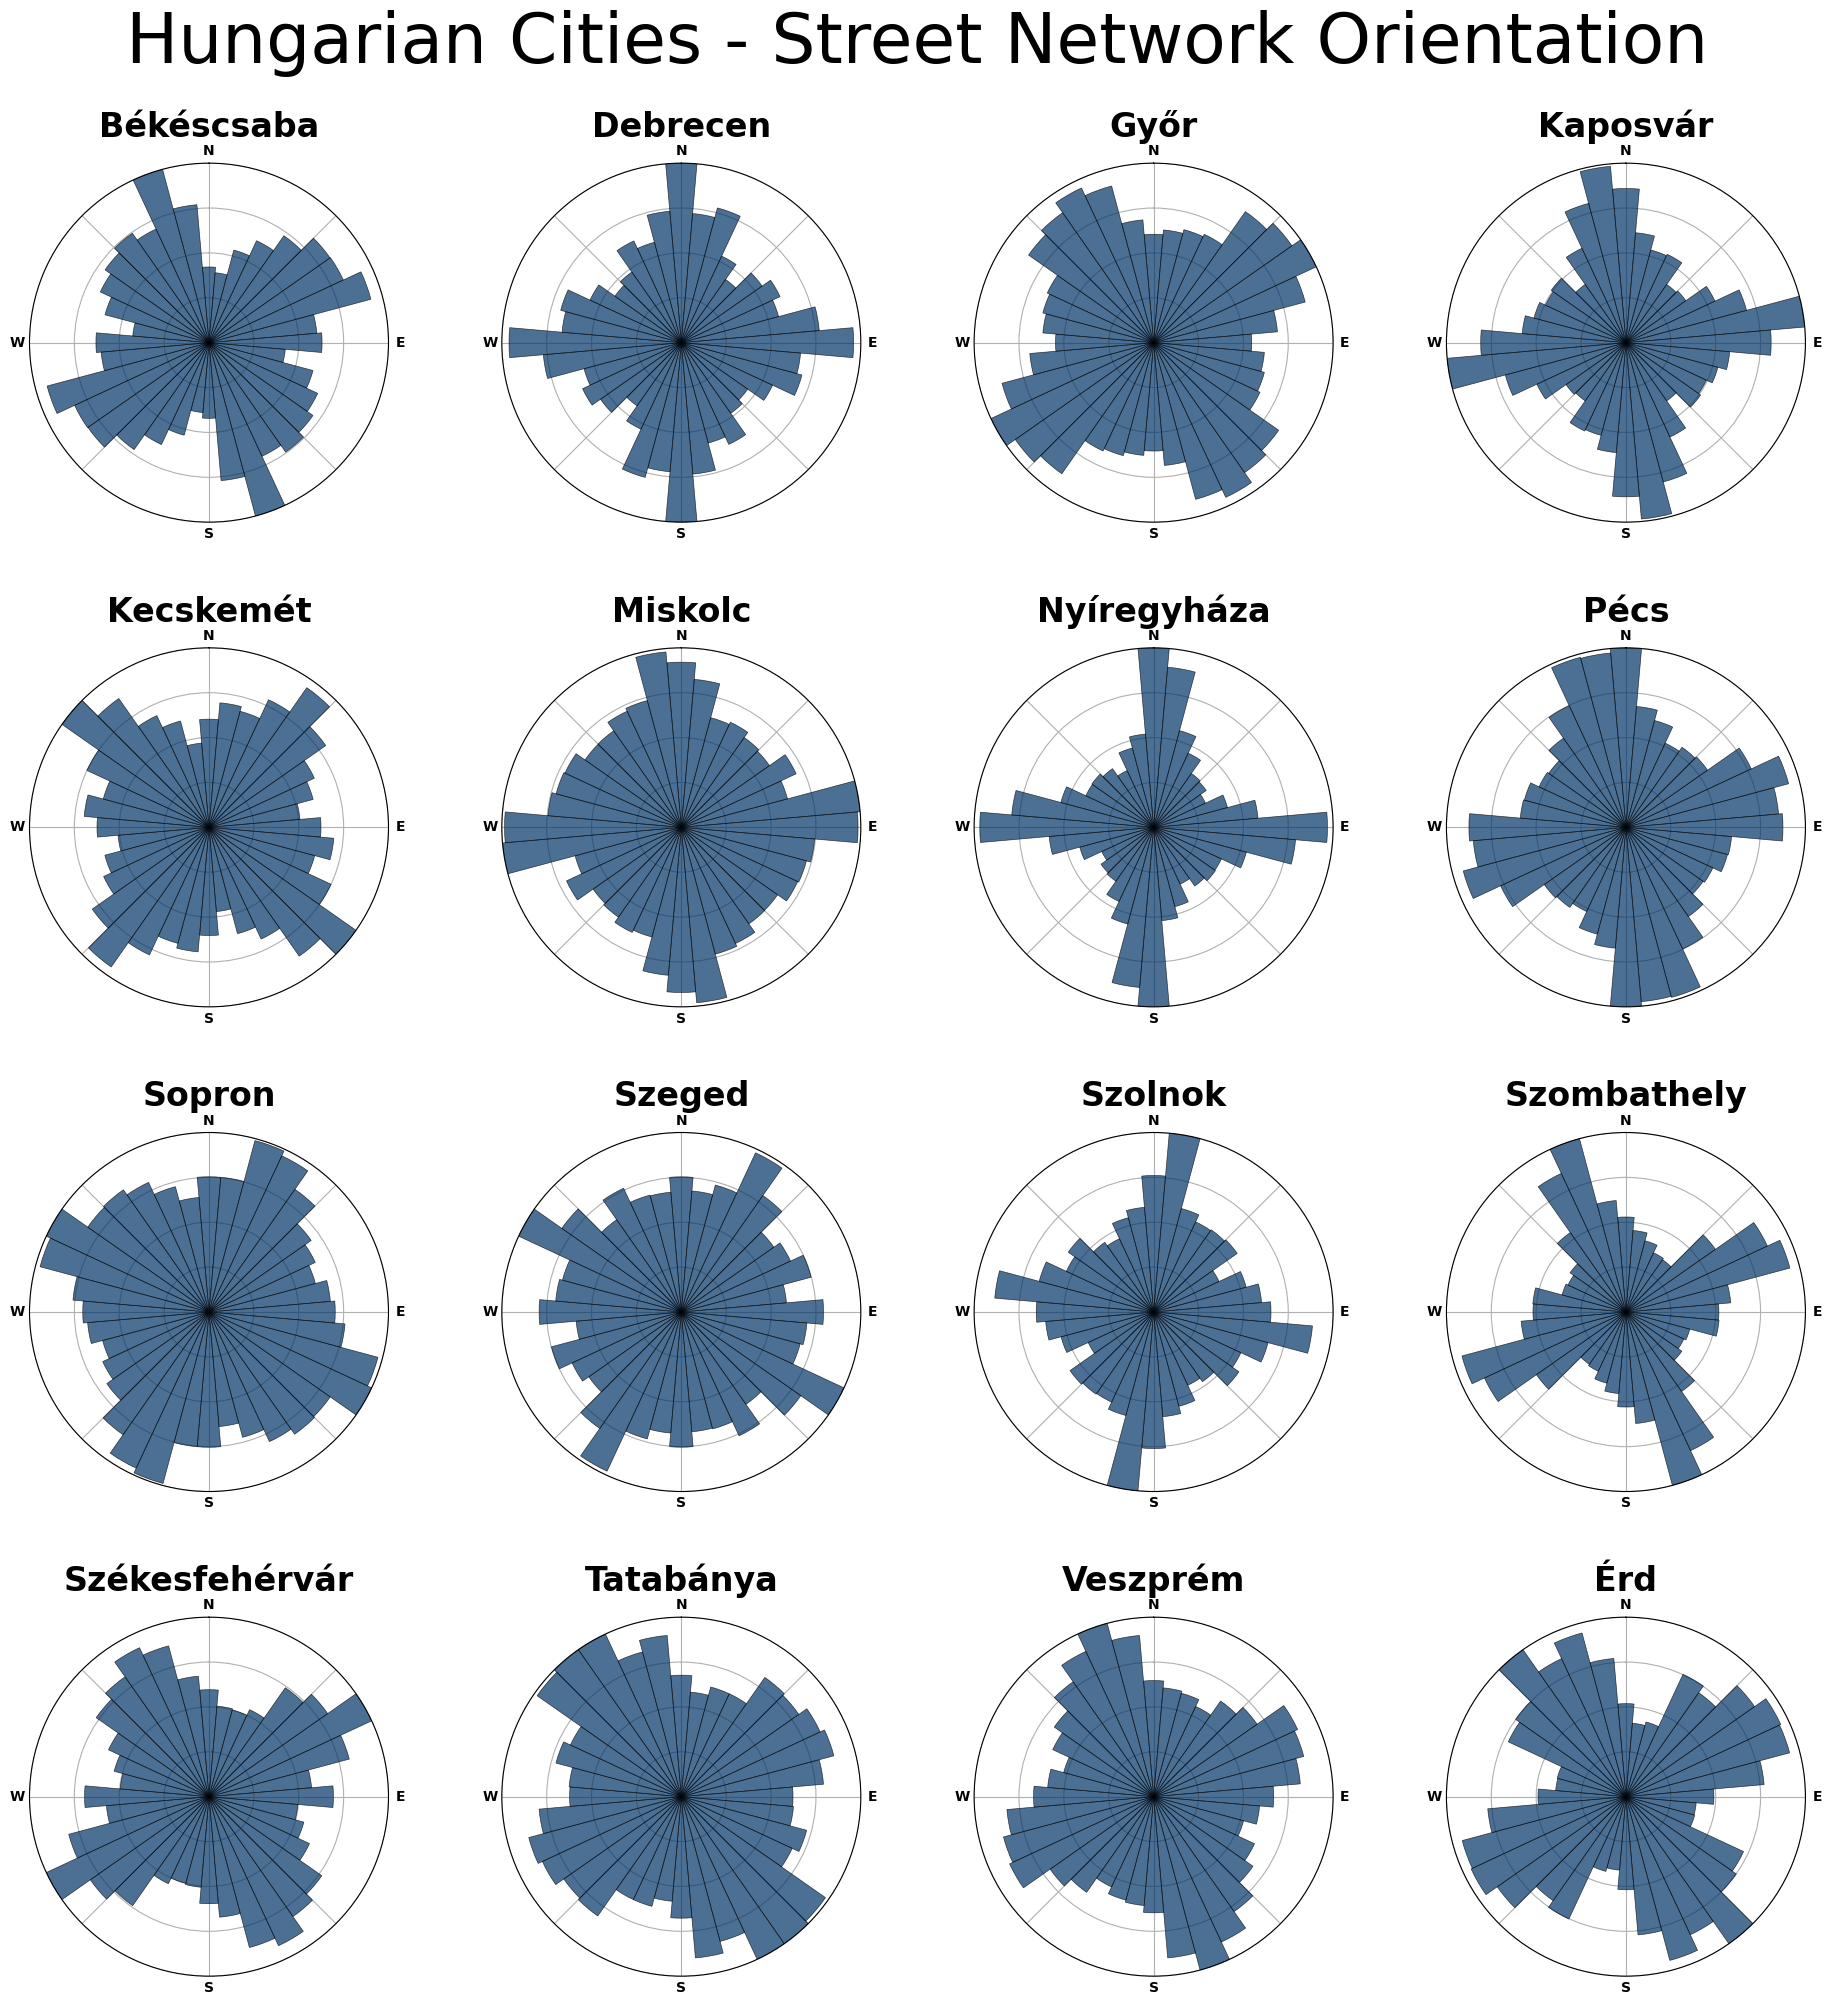

In [23]:
# create figure and axes
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows *5)
fig, axes = plt.subplots(nrows, ncols, figsize = figsize, subplot_kw = {'projection' : 'polar'})

# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(places.keys())):
    print(ox.utils.ts(), place)
    
    # get undirected graphs with edge bearing attributes
    G = ox.graph_from_place(place, network_type = 'drive')
    Gu = ox.add_edge_bearings(ox.get_undirected(G))
    fig, ax = ox.plot_orientation(Gu, ax = ax, title = place, area = True)
    
# add figure title and save image
suptitle_font = {
    'family' : 'DejaVu Sans',
    'fontsize' : 50,
    'fontweight' : 'normal',
    'y' : 1
}

fig.suptitle('Hungarian Cities - Street Network Orientation', **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.35)
fig.savefig('images/street_orientations_hun.png', facecolor = 'w', dpi = 100, bbox_inches = 'tight')
plt.show()